In [1]:
import os
import shutil
from pathlib import Path

import pyvista as pv
import ogstools as ot
import ogstools.variables as ov

import matplotlib.pyplot as plt
import numpy as np

from meshing import create_rectangle_mesh, create_cube_mesh, create_rectangle_frac_mesh

In [2]:

os.getcwd()

'D:\\RUB-Aktiväten\\OGS\\github\\Getting_started_OGS'

# Path

In [3]:
OGS_PATH = None

In [4]:
if OGS_PATH is not None:
    os.environ["OGS_BIN_PATH"] = OGS_PATH
OUT_DIR = Path(os.environ.get("OGS_TESTRUNNER_OUT_DIR", "_out"))
MESH_DIR = OUT_DIR / "mesh"
shutil.rmtree(OUT_DIR, ignore_errors=True)
MESH_DIR.mkdir(parents=True, exist_ok=True)

# 2D mesh

In [5]:
MSH_FILE = MESH_DIR / "rectangle_2d.msh"

create_rectangle_mesh(
        MSH_FILE,
        width=10.0,
        height=10.0,
        mesh_size=1.0,
        center_z=-20.0)

meshes = ot.meshes_from_gmsh(MSH_FILE, log=False)
for name, mesh in meshes.items():
    vtu_path = MESH_DIR / f"{name}.vtu"
    pv.save_meshio(vtu_path, mesh)
    print(f"Saved {vtu_path}")



Saved _out\mesh\domain.vtu
Saved _out\mesh\physical_group_top.vtu
Saved _out\mesh\physical_group_right.vtu
Saved _out\mesh\physical_group_bottom.vtu
Saved _out\mesh\physical_group_left.vtu
Saved _out\mesh\physical_group_domain.vtu


## Plot 

C:\Users\acer\AppData\Local\Temp\ipykernel_11980\1801929542.py:26: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)


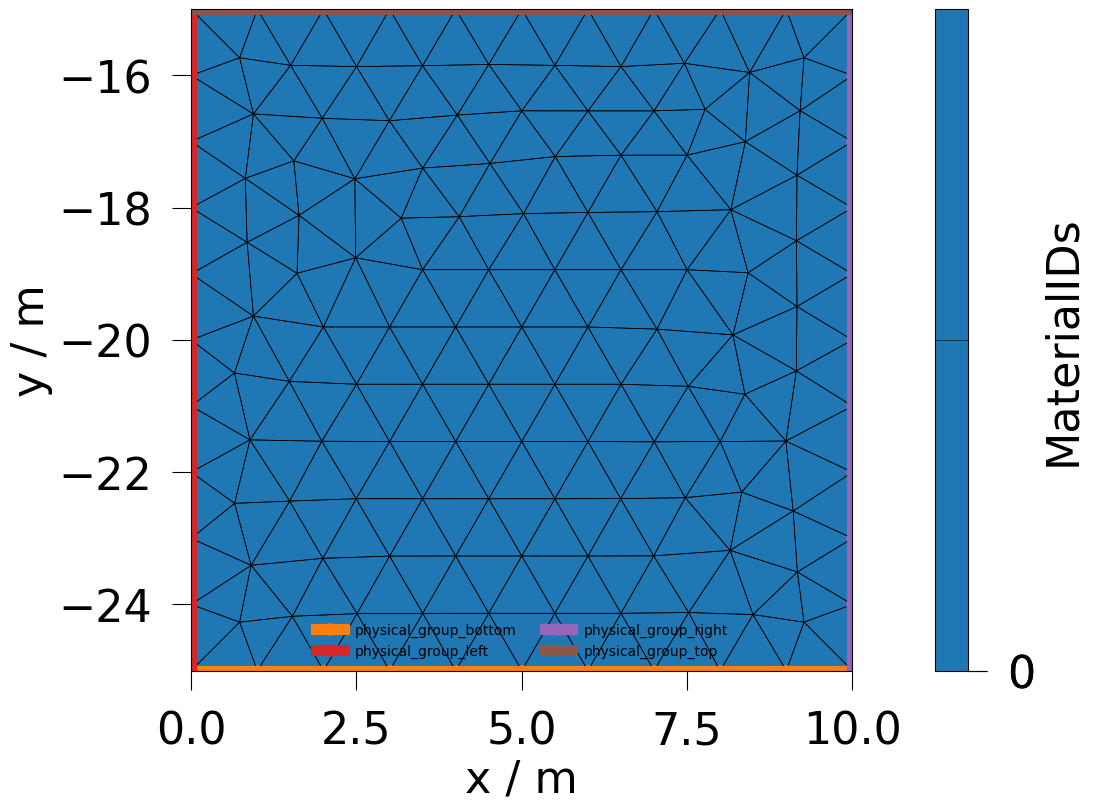

In [6]:
fig = meshes["domain"].plot_contourf(
    "MaterialIDs",
    figsize=(12, 8),
    dpi=100,
    cmap="tab20",
    alpha=0.3,
    linewidth=0,
)
ax = fig.axes[0]
for i, (name, mesh) in enumerate(sorted(meshes.items())):
    if mesh.area:  
        continue
    ls, marker = ("-", "") if "boundary" in name else ("-", "o")
    ot.plot.line(
        mesh,
        ax=ax,
        color=f"C{i}",
        lw=2,
        ls=ls,
        marker=marker,
        markersize=8,
        label=name,
    )
ax.set_aspect("equal")
ax.legend(ncol=2, fontsize=10, frameon=False)
fig.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.show()

# Fracture

INFO:ogstools.meshlib.gmsh_converter:Found material IDs: [1 2 3]
INFO:ogstools.meshlib.gmsh_converter:Renumbered to: [0 1 2]
INFO:ogstools.meshlib.gmsh_converter:domain: Mesh (0x1dd3ea1cdc0)
  N Cells:    270
  N Points:   151
  X Bounds:   0.000e+00, 1.000e+01
  Y Bounds:   -2.500e+01, -1.500e+01
  Z Bounds:   0.000e+00, 0.000e+00
  N Arrays:   1
INFO:ogstools.meshlib.gmsh_converter:physical_group_fracture: UnstructuredGrid (0x1dd3ebf4700)
  N Cells:    12
  N Points:   13
  X Bounds:   0.000e+00, 1.000e+01
  Y Bounds:   -2.289e+01, -1.711e+01
  Z Bounds:   0.000e+00, 0.000e+00
  N Arrays:   2
INFO:ogstools.meshlib.gmsh_converter:physical_group_top_surf: UnstructuredGrid (0x1dd3ebf4280)
  N Cells:    129
  N Points:   82
  X Bounds:   0.000e+00, 1.000e+01
  Y Bounds:   -2.289e+01, -1.500e+01
  Z Bounds:   0.000e+00, 0.000e+00
  N Arrays:   2
INFO:ogstools.meshlib.gmsh_converter:physical_group_bot_surf: UnstructuredGrid (0x1dd3ebc5b40)
  N Cells:    129
  N Points:   82
  X Bounds:   0


Saved _out\mesh\domain_fracture.vtu
Saved _out\mesh\physical_group_fracture_fracture.vtu
Saved _out\mesh\physical_group_top_surf_fracture.vtu
Saved _out\mesh\physical_group_bot_surf_fracture.vtu

Saved _out\mesh\domain_fracture.vtu
Saved _out\mesh\physical_group_p4_fracture.vtu
Saved _out\mesh\physical_group_top_fracture.vtu
Saved _out\mesh\physical_group_bottom_fracture.vtu
Saved _out\mesh\physical_group_right_fracture.vtu
Saved _out\mesh\physical_group_left_fracture.vtu


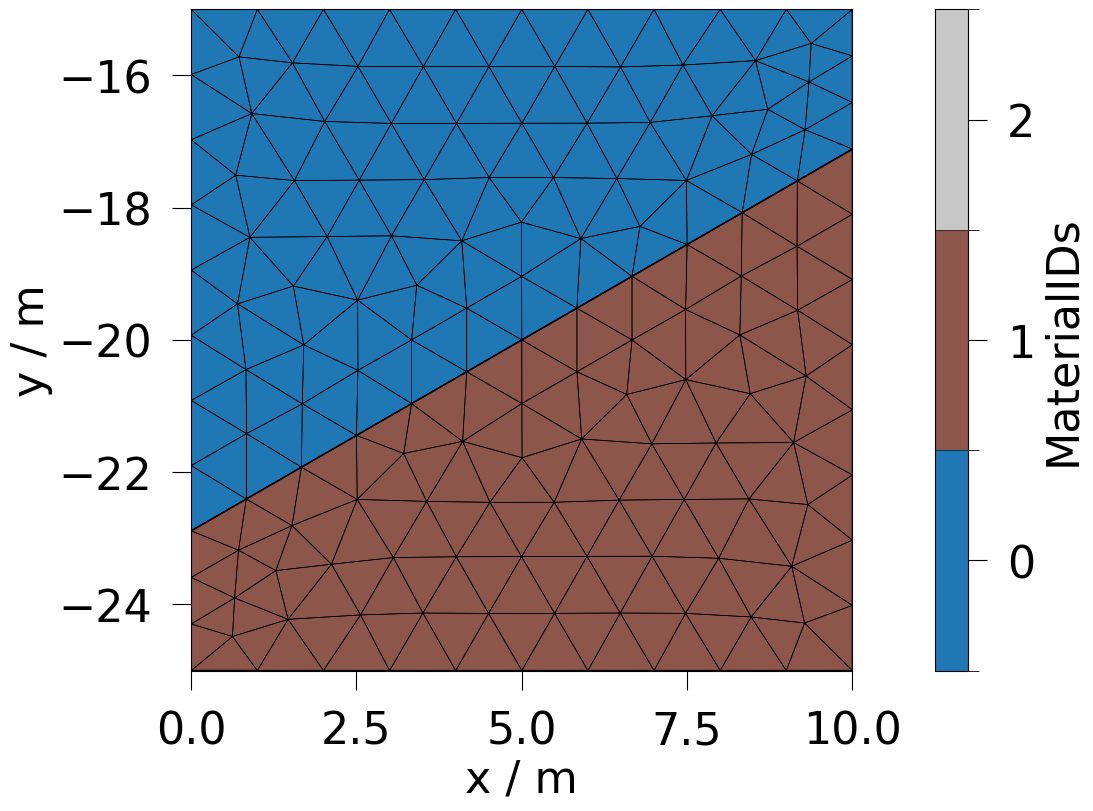

In [7]:
MSH_FILE = MESH_DIR / "rectangle_frac_2d.msh"

create_rectangle_frac_mesh(
        MSH_FILE,
        width=10.0,
        height=10.0,
        mesh_size=1.0,
        center_z=-20.0,
        mode="domain")

meshes = ot.meshes_from_gmsh(MSH_FILE,  dim=[1,2], log=True)
for name, mesh in meshes.items():
    vtu_path = MESH_DIR / f"{name}_fracture.vtu"
    pv.save_meshio(vtu_path, mesh)
    print(f"Saved {vtu_path}")


fig = meshes["domain"].plot_contourf(
    "MaterialIDs",
    figsize=(12, 8),
    dpi=100,
    cmap="tab20",
    alpha=0.3,
    linewidth=0,
)

create_rectangle_frac_mesh(
        MSH_FILE,
        width=10.0,
        height=10.0,
        mesh_size=1.0,
        center_z=-20.0,
        mode="BC")

meshes = ot.meshes_from_gmsh(MSH_FILE,  dim=[0,1], log=False)
for name, mesh in meshes.items():
    vtu_path = MESH_DIR / f"{name}_fracture.vtu"
    pv.save_meshio(vtu_path, mesh)
    print(f"Saved {vtu_path}")

# modified material ID

In [8]:
import math

In [9]:
mesh = ot.Mesh(f'{MESH_DIR}/domain_f.vtu')
mesh.cell_data.remove("MaterialIDs")

def material_ids(pt: np.array) -> int:
    z=-20   
    width=10
    angle_rad = math.radians(30.0)
    p5_x = 0.0
    p6_x =  width 
    p5_y = z - width* math.tan(angle_rad) / 2
    p6_y = z + width* math.tan(angle_rad) / 2

    fun=[]
    fun= (( p6_y- p5_y)/(p6_x-p5_x)*pt[0])-z
    
    ref=(( p6_y- p5_y)/(p6_x-p5_x)*pt[0])+pt[1]-z
    
    if np.sqrt(ref) < fun:
        return 0
    return 1

    if np.sqrt(pt[1]-z) == fun:
        return 2

"""
def material_ids(pt: np.array) -> int:
    if np.sqrt((pt[0] - 5) ** 2 + (pt[1] + 20) ** 2) < 1:
        return 0
    return 1
"""
ccp = mesh.cell_centers().points
mat_ids = np.array([material_ids(pt) for pt in ccp], dtype=np.int32)

mesh.cell_data.set_array(mat_ids, "MaterialIDs")

fig = mesh.plot_contourf(ot.variables.material_id)

FileNotFoundError: File (D:\RUB-Aktiväten\OGS\github\Getting_started_OGS\_out\mesh\domain_f.vtu) not found

# 3D mesh

In [ ]:
cube_file = MESH_DIR / "cube_3d.msh"

create_cube_mesh(
        cube_file,        
        width=10.0,
        height=10.0,
        thickness=10.0,
        mesh_size=1.0,
        center_z=-20.0  
    )

cube_meshes = ot.meshes_from_gmsh(cube_file, log=False)
for name, mesh in cube_meshes.items():
    vtu = MESH_DIR / f"cube_{name}.vtu"
    pv.save_meshio(vtu, mesh)
    print(f"Saved {vtu}")

## Plot 

In [ ]:
try:
    pv.set_jupyter_backend("static")
except Exception as e:
    print("PyVista backend not set:", e)


faces = {
    "bottom": pv.read(f"{MESH_DIR}/cube_physical_group_bottom.vtu"),
    "top":    pv.read(f"{MESH_DIR}/cube_physical_group_top.vtu"),
    "front":  pv.read(f"{MESH_DIR}/cube_physical_group_front.vtu"),
    "back":   pv.read(f"{MESH_DIR}/cube_physical_group_back.vtu"),
    "left":   pv.read(f"{MESH_DIR}/cube_physical_group_left.vtu"),
    "right":  pv.read(f"{MESH_DIR}/cube_physical_group_right.vtu"),
}
vol    = pv.read(f"{MESH_DIR}/cube_physical_group_volume.vtu")

plotter = pv.Plotter(off_screen=True)

face_colors = {
    "bottom": "sandybrown",
    "top":    "lightgray",
    "front":  "lightblue",
    "back":   "lightgreen",
    "left":   "plum",
    "right":  "salmon",
}
for name, mesh in faces.items():
    plotter.add_mesh(
        mesh,
        color=face_colors[name],
        opacity=0.7,
        show_edges=True,
        label=name.capitalize(),
    )

try:
    vol_surf = vol.extract_surface()
except AttributeError:
    vol_surf = vol
plotter.add_mesh(
    vol_surf,
    style="wireframe",
    color="gray",
    opacity=0.2,
    label="Volume",
)

plotter.show_bounds(
    grid="front",       
    location="outer",   
    all_edges=True,     
    ticks="both",       
    xlabel="X",        
    ylabel="Y",         
    zlabel="Z",         
    font_size=14
)

plotter.add_legend(bcolor="w")
plotter.show_axes()
plotter.enable_parallel_projection()
plotter.view_isometric()
plotter.show()

In [ ]:
!NodeReordering -o ./_out/mesh/domain.vtu -i ./_out/mesh/domain.vtu 

In [ ]:

!ogs SD_init.prj -m ./_out/mesh -o ./_out/

In [ ]:

ms = ot.MeshSeries(f'{OUT_DIR}/init.pvd')
mesh = ms[-1]

In [ ]:


fig, axs = plt.subplots(nrows=2, ncols=3, figsize=[30, 10], sharex=True, sharey=True)
displacement = ot.variables.displacement.replace(output_unit="mm")
mesh.plot_contourf(displacement, fig, axs[0,0])
mesh.plot_contourf(ot.variables.stress.trace, fig, axs[0,1])
mesh.plot_contourf(ot.variables.strain.trace, fig, axs[0,2])

mesh.plot_contourf(ot.variables.stress["xx"], fig, axs[1,0])
mesh.plot_contourf(ot.variables.stress["yy"], fig, axs[1,1])
mesh.plot_contourf(ot.variables.stress["zz"], fig, axs[1,2])
fig.tight_layout()



In [ ]:
!NodeReordering -o ./_out/mesh/cube_domain.vtu -i ./_out/mesh/cube_domain.vtu 

In [ ]:
!ogs SD_init_3D.prj -m ./_out/mesh -o ./_out/